In [1]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib ipympl


np.set_printoptions(precision=4) #this is to set the floating point precision

The equation we are trying to implement for now is the following. 

$$ \frac{d r_i}{dt} = - r_i + \big[ W_{ij}r_j + I_i \big]_{+} $$

$r_i$ = `firing_rate` \
$I_i$ = `input_bias` \
$W_{ij}$ = `connectivity_matrix` \

$i$ runs over the neurons (number of neurons = `max_neuron_number`) in the network. \
$\big[ W_{ij}r_j + I_i \big]_{+}$ = max $\left( W_{ij}r_j + I_i,\ 0\right)$


In [2]:
# Initialising all the variables

max_neuron_number = 360
total_time_steps = 500
constant_input_bias = 0.1
tau_m = 0.1 #membrane time constant
dt=0.005 #time step for the simulation
total_time_elapsed = total_time_steps * dt

theta_neurons = np.array([(2*np.pi*i)/max_neuron_number for i in range(max_neuron_number)])
input_bias = np.ones(max_neuron_number)*constant_input_bias

#array of size (neuron_number,length of simulation time steps)
#firing_rate = np.random.random(size=(max_neuron_number, total_time_steps)) 
firing_rate = np.random.rand(total_time_steps,len(theta_neurons))*0.01 #initialise all the voltages at the first time step arbitrarily


#The W_{ij} connectivity in the firing rate equation. Initialised randomly.
#Remember to keep pre-synapse and post synapse order in W, the connectivity matrix
connectivity_matrix = np.random.random(size=(max_neuron_number, max_neuron_number)) 



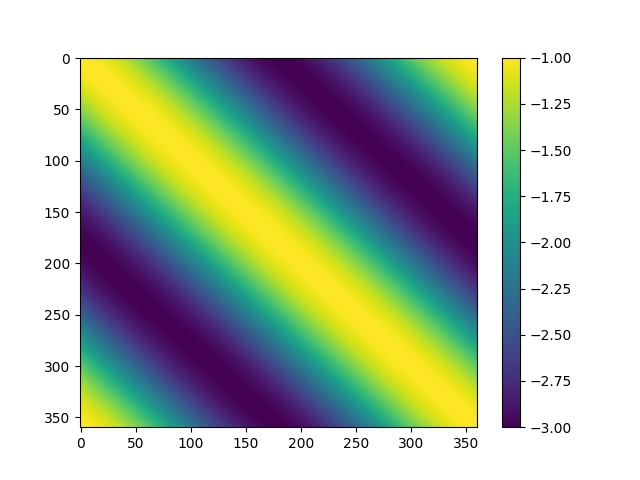

In [3]:
# Defining connectivity
# For stable bump solutions to the ring attractor, one needs to be in a specific parameter regime of W_0 and W_1. 
# Safe bet is to take a negative value for W_0 and have a positive W_1 which are similar order of magnitude.
W_0 = -2
W_1 = 1

for i in range(max_neuron_number):
    for j in range(max_neuron_number):
        connectivity_matrix[i][j] = W_1 * np.cos(theta_neurons[i]-theta_neurons[j]) + W_0 

fig1 = plt.figure()
ax1 = fig1.add_subplot()
im1 = ax1.imshow(connectivity_matrix, aspect='auto')
cbar= fig1.colorbar(im1)



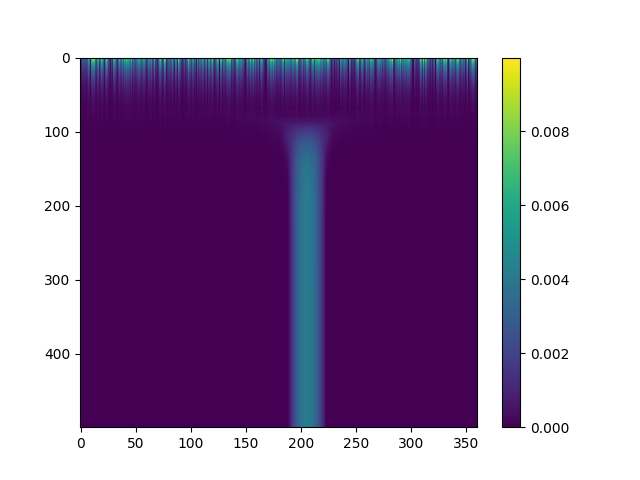

In [4]:
def ring_simulation(total_time_steps,
                    connectivity_matrix,
                    input_bias,
                    firing_rate,
                    dt=dt,
                    tau_m=tau_m):

    #integrating to future time steps
    for t in range(total_time_steps-1):
        u = connectivity_matrix @ firing_rate[t,:]
        for i in range(len(connectivity_matrix)):
            firing_rate[t+1][i] = firing_rate[t][i] + dt/tau_m * (-firing_rate[t][i] + max(u[i] + input_bias[i],0))
    
    #Plotting
    fig2 = plt.figure()
    ax2 = fig2.add_subplot()
    im2 = ax2.imshow(firing_rate, aspect='auto')
    cbar = fig2.colorbar(im2)
    #fig3.show()

    return firing_rate
            
firing_rate = ring_simulation(total_time_steps=total_time_steps,
                    connectivity_matrix=connectivity_matrix,
                    input_bias=input_bias,
                    firing_rate=firing_rate,
                    dt=dt,
                    tau_m=tau_m)


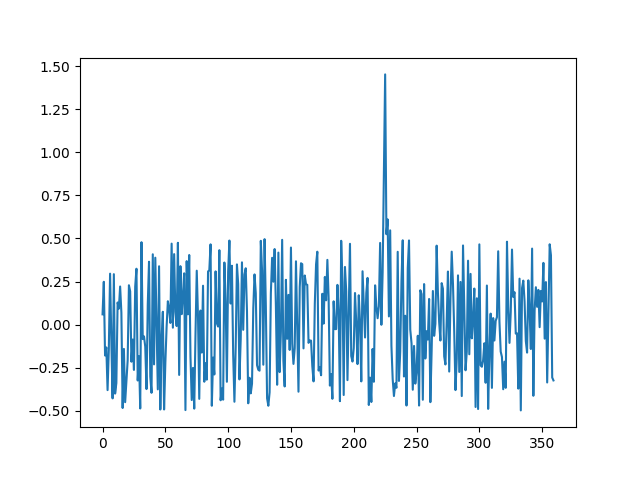

In [9]:
## Simulating again
fig_input_bias_pre = plt.figure()
ax_input_bias_pre = plt.plot(input_bias)

# The motion direction of the stimulus = `visual_cue`
visual_cue = 225

k_constant = 1
random_baseline_adjustment = 0.5

firing_rate[0,:]=firing_rate[-1,:]
input_bias = np.random.random(size=len(input_bias)) - random_baseline_adjustment

for i in range(5):
    input_bias[visual_cue-4+i] += k_constant*(1+i)*constant_input_bias
    input_bias[visual_cue+i] += k_constant*(5-i)*constant_input_bias

plt.close('all')
fig_input_bias = plt.figure()
ax_input_bias = plt.plot(input_bias)

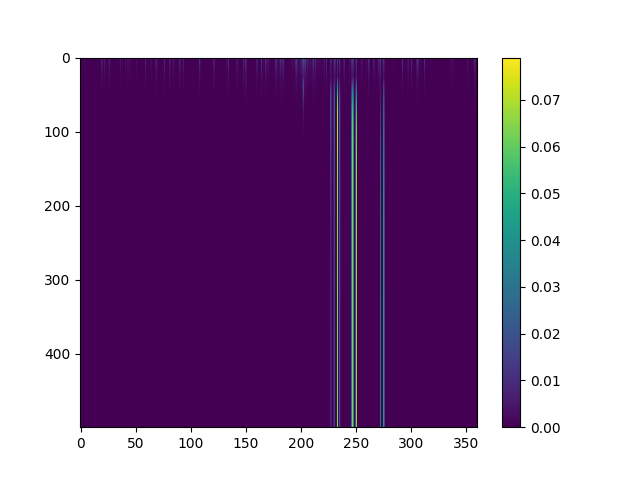

In [7]:

firing_rate = ring_simulation(total_time_steps=total_time_steps,
                    connectivity_matrix=connectivity_matrix,
                    input_bias=input_bias,
                    firing_rate=firing_rate,
                    dt=dt,
                    tau_m=tau_m)

In [ ]:
plt.close('all')
max_index = np.argmax(firing_rate[-1,:])
plt.plot(range(max_neuron_number), firing_rate[-1,:])
plt.title("Ring Simulation Output")
plt.text(45, np.max(firing_rate[-1,:]), f"Max Neuron: {max_index}", ha='right', va='top')  # Add a text label for the maximum value
plt.show()